t: 0.028 [s], Average temperature: 32.00 Celcius


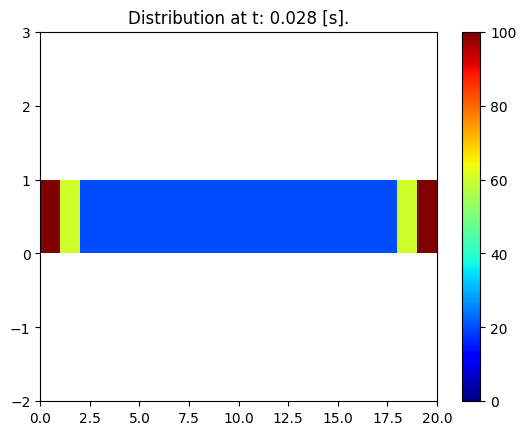

t: 0.057 [s], Average temperature: 34.00 Celcius
t: 0.085 [s], Average temperature: 36.00 Celcius
t: 0.114 [s], Average temperature: 37.50 Celcius
t: 0.142 [s], Average temperature: 39.00 Celcius
t: 0.170 [s], Average temperature: 40.25 Celcius
t: 0.199 [s], Average temperature: 41.50 Celcius
t: 0.227 [s], Average temperature: 42.59 Celcius
t: 0.256 [s], Average temperature: 43.69 Celcius
t: 0.284 [s], Average temperature: 44.67 Celcius
t: 0.312 [s], Average temperature: 45.66 Celcius
t: 0.341 [s], Average temperature: 46.56 Celcius
t: 0.369 [s], Average temperature: 47.46 Celcius
t: 0.398 [s], Average temperature: 48.30 Celcius
t: 0.426 [s], Average temperature: 49.14 Celcius
t: 0.455 [s], Average temperature: 49.92 Celcius
t: 0.483 [s], Average temperature: 50.71 Celcius
t: 0.511 [s], Average temperature: 51.45 Celcius
t: 0.540 [s], Average temperature: 52.19 Celcius
t: 0.568 [s], Average temperature: 52.90 Celcius
t: 0.597 [s], Average temperature: 53.60 Celcius
t: 0.625 [s], Averag

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Defining our problem

a = 110
length = 50 #mm
time = 4 #seconds
nodes = 20

# Initialization 

dx = length / nodes
dt = 0.5 * dx**2 / a
t_nodes = int(time/dt)

u = np.zeros(nodes) + 20 # Plate is initially as 20 degres C

# Boundary Conditions 

u[0] = 100
u[-1] = 100


# Visualizing with a plot

fig, axis = plt.subplots()

pcm = axis.pcolormesh([u], cmap=plt.cm.jet, vmin=0, vmax=100)
plt.colorbar(pcm, ax=axis)
axis.set_ylim([-2, 3])

# Simulating

counter = 0

while counter < time :

    w = u.copy()

    for i in range(1, nodes - 1):

        u[i] = dt * a * (w[i - 1] - 2 * w[i] + w[i + 1]) / dx ** 2 + w[i]

    counter += dt

    print("t: {:.3f} [s], Average temperature: {:.2f} Celcius".format(counter, np.average(u)))

    # Updating the plot

    pcm.set_array([u])
    axis.set_title("Distribution at t: {:.3f} [s].".format(counter))
    plt.pause(0.01)


plt.show()


t: 0.006 [s], Average temperature: 24.07 Celcius


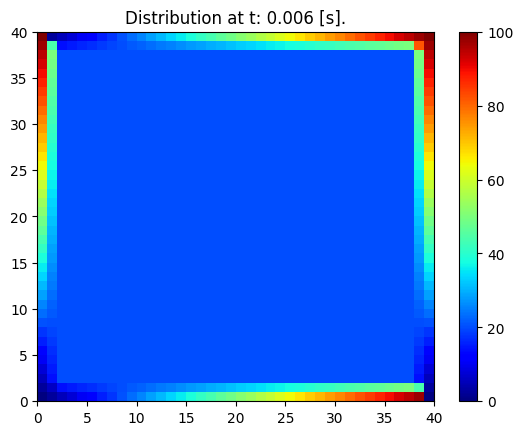

t: 0.011 [s], Average temperature: 24.73 Celcius
t: 0.017 [s], Average temperature: 25.30 Celcius
t: 0.023 [s], Average temperature: 25.77 Celcius
t: 0.028 [s], Average temperature: 26.20 Celcius
t: 0.034 [s], Average temperature: 26.59 Celcius
t: 0.040 [s], Average temperature: 26.95 Celcius
t: 0.045 [s], Average temperature: 27.27 Celcius
t: 0.051 [s], Average temperature: 27.59 Celcius
t: 0.057 [s], Average temperature: 27.86 Celcius
t: 0.063 [s], Average temperature: 28.16 Celcius
t: 0.068 [s], Average temperature: 28.38 Celcius
t: 0.074 [s], Average temperature: 28.71 Celcius
t: 0.080 [s], Average temperature: 28.81 Celcius
t: 0.085 [s], Average temperature: 29.29 Celcius
t: 0.091 [s], Average temperature: 29.07 Celcius
t: 0.097 [s], Average temperature: 30.10 Celcius
t: 0.102 [s], Average temperature: 28.80 Celcius
t: 0.108 [s], Average temperature: 31.80 Celcius
t: 0.114 [s], Average temperature: 26.72 Celcius
t: 0.119 [s], Average temperature: 36.91 Celcius
t: 0.125 [s], Averag

In [4]:
import numpy as np
import matplotlib.pyplot as plt


# Defining our problem

a = 110
length = 50 #mm
time = 4 #seconds
nodes = 40

# Initialization 

dx = length / nodes
dy = length / nodes

dt = min(   dx*2 / (4 * a),     dy*2 / (4 * a))

t_nodes = int(time/dt)

u = np.zeros((nodes, nodes)) + 20 # Plate is initially as 20 degres C

# Boundary Conditions 

u[0, :] = np.linspace(0, 100, nodes)
u[-1, :] = np.linspace(0, 100, nodes)

u[:, 0] = np.linspace(0, 100, nodes)
u[:, -1] = np.linspace(0, 100, nodes)

# Visualizing with a plot

fig, axis = plt.subplots()

pcm = axis.pcolormesh(u, cmap=plt.cm.jet, vmin=0, vmax=100)
plt.colorbar(pcm, ax=axis)

# Simulating

counter = 0

while counter < time :

    w = u.copy()

    for i in range(1, nodes - 1):
        for j in range(1, nodes - 1):

            dd_ux = (w[i-1, j] - 2*w[i, j] + w[i+1, j])/dx**2
            dd_uy = (w[i, j-1] - 2*w[i, j] + w[i, j+1])/dy**2

            u[i, j] = dt * a * (dd_ux + dd_uy) + w[i, j]

    counter += dt

    print("t: {:.3f} [s], Average temperature: {:.2f} Celcius".format(counter, np.average(u)))

    # Updating the plot

    pcm.set_array(u)
    axis.set_title("Distribution at t: {:.3f} [s].".format(counter))
    plt.pause(0.01)


plt.show()